In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Layer
from keras import backend as K

In [2]:
df = pd.read_csv('data/cleaned_data1.csv')

In [3]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(529, 37)

In [5]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=7, n_components=10)
X = lle.fit_transform(X)

In [6]:
train_features, test_features, train_target, test_target = train_test_split(X,y,test_size=0.33, random_state=13)

In [7]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [8]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(RBFLayer(10, 0.3))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_features,train_target,validation_data=(test_features,test_target),epochs=100,batch_size=32)

Epoch 1/100
12/12 [==============================] - 1s 59ms/step - loss: 0.8362 - accuracy: 0.3164 - val_loss: 0.7978 - val_accuracy: 0.3429
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7922 - accuracy: 0.3164 - val_loss: 0.7621 - val_accuracy: 0.3429
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7552 - accuracy: 0.3164 - val_loss: 0.7310 - val_accuracy: 0.3429
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7234 - accuracy: 0.3164 - val_loss: 0.7047 - val_accuracy: 0.3429
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6962 - accuracy: 0.4520 - val_loss: 0.6833 - val_accuracy: 0.6571
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6735 - accuracy: 0.6836 - val_loss: 0.6668 - val_accuracy: 0.6571
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 0.6836 - val_loss: 0.6557 - val_accuracy: 0.6571
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5024 - accuracy: 0.7571 - val_loss: 0.5084 - val_accuracy: 0.7657
Epoch 60/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5004 - accuracy: 0.7627 - val_loss: 0.5060 - val_accuracy: 0.7657
Epoch 61/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4983 - accuracy: 0.7599 - val_loss: 0.5053 - val_accuracy: 0.7600
Epoch 62/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4961 - accuracy: 0.7486 - val_loss: 0.5033 - val_accuracy: 0.7600
Epoch 63/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4940 - accuracy: 0.7542 - val_loss: 0.4996 - val_accuracy: 0.7714
Epoch 64/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4920 - accuracy: 0.7627 - val_loss: 0.4969 - val_accuracy: 0.7771
Epoch 65/100
12/12 [==============================] - 0s 10ms/step - loss: 0.4902 - accuracy: 0.7655 - val_loss: 0.4949 - val_accuracy: 0.7829
Epoch

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
rbf_layer (RBFLayer)         (None, 10)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


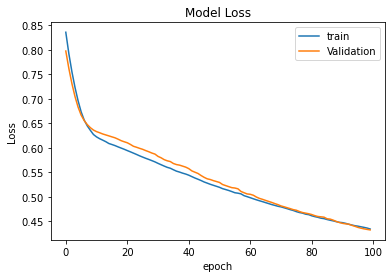

In [11]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'],loc='upper right')
plt.show()

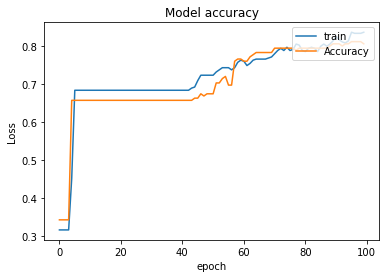

In [12]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','Accuracy'],loc='upper right')
plt.show()

In [13]:
loss, acc = model.evaluate(test_features, test_target, verbose=0)
print('Test Accuracy: %.3f' %(acc * 100.0))

Test Accuracy: 80.571


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(test_features)
data = []
for x in prediction:
    if x[0] > 0.5:
        data.append(1)
    else:
        data.append(0)

cnf_matrix = confusion_matrix(test_target, data)
cnf_matrix

array([[112,   3],
       [ 31,  29]], dtype=int64)

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE_test = sqrt(mean_squared_error(test_target, prediction)) 


from sklearn.metrics import mean_squared_error
from math import sqrt
train_prediction = model.predict(train_features)
RMSE_train = sqrt(mean_squared_error(train_target, train_prediction))

print('Traning RMSE: %.4f'%RMSE_train)
print('\n')
print('Testing RMSE: %.4f'%RMSE_test)

Traning RMSE: 0.3656


Testing RMSE: 0.3658
